In [190]:
import numpy as np
from random import randint, seed
import matplotlib.pyplot as plt

In [191]:
# Constants
N_villes = 10 # nombre de villes
M = N_villes  # nombre de fourmis
N_iterations = N_villes  # nombres d'itération dans chaque cycle
C = 0.2  # valeur initial de phéromones
e = 0.5 # vitesse d'evaporation
# alpha & beta controlent l'importance relative entre les phéromones et visibilité
alpha = 1 
beta = 5
Q = 100 # Quantité de pheromones ?!
NCmax = 20 # nombre max de cycles

Ant created ! 
Ant created ! 
Ant created ! 
Ant created ! 
Ant created ! 
Ant created ! 
Ant created ! 
Ant created ! 
Ant created ! 
Ant created ! 


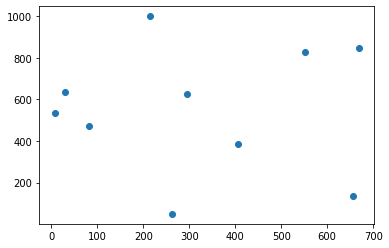

In [219]:
# initialization
seed(30)
cities = np.array([[randint(0,1000), randint(0,1000)] for _ in range(N_villes)])  # generate N cities
plt.scatter(cities[:,0], cities[:,1])
U = np.array([[ calcul_distance(cities[i], cities[j]) for i in range(N_villes)] for j in range(N_villes)])   # distances entre les villes
taux = np.array([[0 if i==j else C for i in range(N_villes)] for j in range(N_villes)])  # quantité de phéromones déposé entre villes
Visibility = np.array([[0 if U[i,j]==0 else 1/U[i,j] for j in range(N_villes)] for i in range(N_villes)])  # visibility entre villes = 1/U
ants = [Ant() for i in range(N_villes)]  # ants
#U.view()
#Taux.view()
#Visibility.view()

In [220]:
class Ant:

  def __init__(self):
    self.memory = []  # contains visited cities
    print("Ant created ! ")
  
  def clear_memory(self):
    self.memory = []
    
  def city_visited(self,city):
    self.memory.append(city)
    
  def calcul_probability(self):  # probabilité de choisir une ville
    current_city = self.memory[-1]  # get current city
    s = np.sum(0 if j in self.memory else (taux[current_city, j]**alpha) * (Visibility[current_city, j]**beta) for j in range(N_villes)) 
    probability = np.array([0 if j in self.memory else (taux[current_city, j]**alpha) * (Visibility[current_city, j]**beta)/s for j in range(N_villes)])
    
    return probability
  
  def parcoured_distance(self):
    distances = np.array([U[self.memory[i-1],self.memory[i]] for i in range(1,len(self.memory))] ) # list des distances entre les villes parcourus par la ant
    parcoured_dist = distances.sum()
    print(f"sum : {parcoured_dist}")
    
    return parcoured_dist
  
  def calcul_deposed_pheromones(self):  # caluler la quantité de pheromones déposé par une ant
    deposed_pheromones = np.zeros((N_villes, N_villes))
    for i in range(1,len(self.memory)) : 
      deposed_pheromones[self.memory[i-1],self.memory[i]] = Q / self.parcoured_distance()
      
    return deposed_pheromones
  
  def show_visited_cities(self):
    print(f" - {city}" for city in self.memory)
    

In [221]:
def calcul_distance(city1, city2):
  return np.sqrt(np.power(city1[0]- city2[0], 2) + np.power(city1[1] - city2[1], 2))

In [222]:
def update_pheromones(): # update pheromones
  sum_deposed_pheromones = np.zeros((N_villes, N_villes))   # sum deposed 
  for ant in ants:
    sum_deposed_pheromones += ant.calcul_deposed_pheromones()
  t = e*taux + sum_deposed_pheromones  # ?? 
  return t

In [223]:
def get_pheromones():
  return taux

In [224]:
n_cycle = 0
m = None  # min parcoured_distance
best_path = []  # best path
while n_cycle < NCmax :
  for it in range(N_iterations):
    # first iteration in the first cycle
    if it == 0 :  
      # each ant will start from a city randomly (we can use algo like Fisher-Yates shuffle)
      for i, ant in enumerate(ants) :   # we use i because in our case, cities & ants are known only by their indexes (0...N_villes-1)
        ant.city_visited(i)    # ant i will begun from city i
    
    else :
      #choose path based on 
      for i, ant in enumerate(ants):
        next_city = np.argmax(ant.calcul_probability())   # indice of city with bigest probability
        ant.city_visited(next_city) 
        print(f"{it} -- {ant.memory}")
  
  # end of each cycle
  for ant in ants :
    distance = ant.parcoured_distance()
    if not m or m > distance :
      m = distance
      best_path = ant.memory
    
    # update probabilities 
    
  
    # update pheromones
  old_taux = get_pheromones()   # memorize Taux(t)
  new_taux = update_pheromones()  # update Taux(t) to Taux(t+1)
  if(old_taux.all() == new_taux.all()):
    break;
  
  for ant in ants:
    ant.clear_memory()
    

1 -- [0, 3]
1 -- [1, 8]
1 -- [2, 9]
1 -- [3, 0]
1 -- [4, 0]
1 -- [5, 6]
1 -- [6, 1]
1 -- [7, 6]
1 -- [8, 9]
1 -- [9, 8]
2 -- [0, 3, 1]
2 -- [1, 8, 9]
2 -- [2, 9, 8]
2 -- [3, 0, 1]
2 -- [4, 0, 3]
2 -- [5, 6, 1]
2 -- [6, 1, 8]
2 -- [7, 6, 1]
2 -- [8, 9, 2]
2 -- [9, 8, 2]
3 -- [0, 3, 1, 8]
3 -- [1, 8, 9, 2]
3 -- [2, 9, 8, 1]
3 -- [3, 0, 1, 8]
3 -- [4, 0, 3, 1]
3 -- [5, 6, 1, 8]
3 -- [6, 1, 8, 9]
3 -- [7, 6, 1, 8]
3 -- [8, 9, 2, 1]
3 -- [9, 8, 2, 1]
4 -- [0, 3, 1, 8, 9]
4 -- [1, 8, 9, 2, 4]
4 -- [2, 9, 8, 1, 6]
4 -- [3, 0, 1, 8, 9]
4 -- [4, 0, 3, 1, 8]
4 -- [5, 6, 1, 8, 9]
4 -- [6, 1, 8, 9, 2]
4 -- [7, 6, 1, 8, 9]
4 -- [8, 9, 2, 1, 6]
4 -- [9, 8, 2, 1, 6]
5 -- [0, 3, 1, 8, 9, 2]
5 -- [1, 8, 9, 2, 4, 0]
5 -- [2, 9, 8, 1, 6, 7]
5 -- [3, 0, 1, 8, 9, 2]
5 -- [4, 0, 3, 1, 8, 9]
5 -- [5, 6, 1, 8, 9, 2]
5 -- [6, 1, 8, 9, 2, 4]
5 -- [7, 6, 1, 8, 9, 2]
5 -- [8, 9, 2, 1, 6, 7]
5 -- [9, 8, 2, 1, 6, 7]
6 -- [0, 3, 1, 8, 9, 2, 4]
6 -- [1, 8, 9, 2, 4, 0, 3]
6 -- [2, 9, 8, 1, 6, 7, 5]
6 -- [3, 0, 1, 8, 9

C:\Users\MHD\AppData\Local\Temp\ipykernel_3636\3490546569.py:15: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  s = np.sum(0 if j in self.memory else (taux[current_city, j]**alpha) * (Visibility[current_city, j]**beta) for j in range(N_villes))


In [225]:
print(best_path)

[4, 0, 3, 1, 8, 9, 2, 6, 7, 5]


[[ 215 1000]
 [ 552  827]
 [ 669  846]
 [ 296  625]
 [  83  472]
 [   7  534]
 [  30  636]
 [ 406  385]
 [ 656  137]
 [ 263   49]]


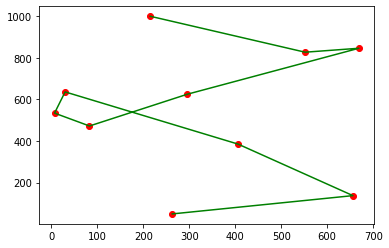

In [226]:

ordered_cities = cities[best_path]

print(ordered_cities)
plt.plot(ordered_cities[:,0],ordered_cities[:,1], color="green")
plt.scatter(cities[:,0], cities[:,1], color="red")
plt.show()